# Урок 3

## Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

### Генеральная совокупность и выборка

__Генеральная совокупность__ — это множество, которое содержит данные обо всех объектах, соответствующих определённым характеристикам.

__Выборка__ — это случайным образом выбранная часть генеральной совокупности.

По выборкам можно оценивать характеристики рассматриваемых объектов. Например, если дана выборка из значений некоторой случайной величины, с помощью этой выборки можно попытаться оценить параметры этой случайной величины.

__Статистика__ — это любая функция от выборки.

Познакомимся со статистиками на примере датасета с данными по хоккеистам. Данные доступны [здесь](https://habr.com/post/301340/).

In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

Импортируем и подготовим данные.

In [2]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])
df = df.drop_duplicates(['name', 'birth'])

df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


Пусть дана выборка $x = (x_1, x_2, \dots, x_m)$ из значений одномерной случайной величины. Одной из наиболее естественных статистик таких выборок является __среднее арифметическое__ (или __выборочное среднее__):

$$\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i.$$

Выборочное среднее является оценкой для математического ожидания.

__Пример 1__

Найдем выборочное среднее роста хоккеистов из датасета по формуле.

In [3]:
mean_height = df['height'].sum() / df['height'].shape[0]
mean_height

183.829386763813

Эту же величину можно вычислить сразу с помощью метода `.mean`.

In [4]:
df['height'].mean()

183.829386763813

__Выборчная дисперсия__, как следует из названия, оценивает дисперсию случайной величины:
$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2$$

__Пример 2__

Посчитаем выборочную дисперсию роста хоккеистов.

In [5]:
((df['height'] - df['height'].mean()) ** 2).sum() / df['height'].shape[0]

29.885888087815086

Массив `(df['height'] - df['height'].mean()) ** 2` представляет собой элементы из `df['height']`, из которых поэлементно вычли их среднее, а затем возвели в квадрат:

In [6]:
(df['height'] - df['height'].mean()) ** 2

0        1.370335
1       17.394015
2        3.346656
3       33.981750
4       77.958071
          ...    
6286    14.664203
6288    33.981750
6289    51.417694
6290    17.394015
6291    84.100147
Name: height, Length: 3294, dtype: float64

То же с помощью готовой функции `.var`:

In [7]:
df['height'].var()

29.894963668771

Значения не совпали. Почему?

Несмотря на кажущуюся естественность, данная оценка является не очень хорошей в силу своей __смещённости__ (об этом буквально чуть позже). Поэтому в практических задачах используют __несмещённую оценку дисперсии__:
$$\sigma_{unbiased}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2$$

__Пример 3__

Несмещённая оценка дисперсии роста хоккеистов:

In [8]:
((df['height'] - df['height'].mean())**2).sum() / (df['height'].shape[0] - 1)

29.894963668771

Что такое смещённая и несмещённая оценки?

На самом деле каждый объект из выборки — это тоже случайная величина (поскольку выбирается случайным образом). В таком случае и любая статистика (т.е. функция от выборки) является случайной величиной.

Оценка некоторого параметра случайной величины называется __несмещённой__, если математическое ожидание этой оценки равняется реальному значению этого параметра.

Например, выборочное среднее является несмещённой оценкой математического ожидания:
$$M(\overline{x}) = M(X)$$

Оказывается, обычная оценка дисперсии является смещённой:
$$M(\sigma^2) = \dfrac{m - 1}{m} D(X)$$

Контролировать смещение этой и подобных оценок можно с помощью аргумента `ddof` (Delta Degrees of Freedom). В этом параметре указывается то, сколько нужно вычесть из количества элементов в выборке. Например, смещённую оценку можно получить, указав аргумент `ddof=0`:

In [9]:
df['height'].var(ddof=0)

29.885888087815086

_Замечание_: с этим параметром стоит быть осторожным, потому что его значение по умолчанию отличается в библиотеках `numpy` и `pandas`:

In [10]:
help(pd.DataFrame.var)

Help on function var in module pandas.core.frame:

var(self, axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
    Return unbiased variance over requested axis.
    
    Normalized by N-1 by default. This can be changed using the ddof argument
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series
    ddof : int, default 1
        Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
        where N represents the number of elements.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    
    Returns
    -----

In [11]:
help(np.var)

Help on function var in module numpy:

var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the variance along the specified axis.
    
    Returns the variance of the array elements, a measure of the spread of a
    distribution.  The variance is computed for the flattened array by
    default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose variance is desired.  If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the variance is computed.  The default is to
        compute the variance of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a variance is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the variance.  For arrays of integer t

Вообще, дисперсия является не очень наглядной мерой разброса, поскольку имеет другой масштаб. Поэтому часто наряду с дисперсией используют __среднее квадратическое отклонение__, равное корню из дисперсии.

Оценивается среднее квадратическое отклонение аналогично дисперсии. Смещённая и несмещённая оценки:
$$\sigma =  \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2}, \:\:
\sigma_{unbiased} = \sqrt{\dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2}$$

__Пример 4__

Среднее квадратическое отклонение роста хоккеистов (несмещённая оценка):

In [12]:
np.sqrt(((df['height'] - df['height'].mean()) ** 2).sum() / (df['height'].shape[0] - 1))

5.467628706191652

То же с помощью готовой функции `.std`:

In [13]:
df['height'].std(ddof=1)

5.467628706191652

Итак, мы видим, что в среднем рост хоккеистов отклоняется от своего среднего примерно на $5.4676$.

### Мода,  медиана, квантиль

__Мода выборки__ — наиболее часто встречающееся в выборке значение.

Вычисление моды отличается для дискретных и _непрерывных_ случайных величин (о последних мы поговорим позже). Поэтому для примера возьмём какой-нибудь дискретный признак из наших данных. Таковым является, например, вес: он в таблице представлен целыми числами. 

__Пример 5__

Для начала посмотрим, как часто встречаются в выборке те или иные значения веса. Это можно сделать с помощью метода `.value_counts`:

In [14]:
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [15]:
df['weight'].value_counts()

90.0     225
88.0     213
80.0     203
85.0     199
86.0     182
84.0     179
83.0     159
82.0     159
93.0     151
91.0     149
87.0     147
92.0     133
89.0     133
95.0     121
78.0      93
94.0      86
98.0      81
81.0      73
100.0     73
96.0      69
79.0      66
75.0      54
77.0      43
97.0      40
76.0      39
99.0      31
74.0      28
72.0      23
103.0     23
104.0     17
101.0     17
73.0      16
102.0     13
105.0     13
70.0       9
106.0      7
108.0      6
71.0       6
110.0      4
109.0      3
107.0      2
117.0      2
112.0      1
116.0      1
81.5       1
65.0       1
Name: weight, dtype: int64

Чаще всего встречается значение $90$. Это и есть мода. Её можно также посчитать с помощью метода `.mode`:

In [16]:
df['weight'].mode()

0    90.0
dtype: float64

__Медиана выборки__ — такое значение $a$, что хотя бы половина элементов из выборки меньше, либо равна $a$, и, соответственно, хотя бы половина больше, либо равна $a$.

Медиана представляет собой _середину_ выборки: если отсортировать элементы выборки по возрастанию, то медиана приходится на середину. 

Слова «хотя бы» относятся к следующим особенным ситуациям:

1. когда в выборке нечётное число элементов, поскольку в этом случае медиана приходится на один из элементов выборки, поэтому разделить эту выборку ровно пополам невозможно,
2. когда медиана оказывается между одинаковыми значениями (если в выборке есть повторы), поскольку в этом случае медиана тоже оказывается равной этому значению.

__Пример 6__

Посчитаем медиану роста хоккеистов. Для начала воспользуемся определением. В таком случае нам достаточно отсортировать значения из выборки и взять середину этого массива.

In [17]:
height = sorted(df['height'])

len(height)

3294

In [18]:
height[:15]

[165, 165, 165, 166, 166, 168, 168, 170, 170, 170, 170, 170, 170, 170, 170]

Выведем несколько значений вокруг середины этого массива.

In [19]:
length = len(height)

height[length // 2 - 5 : length // 2 + 5]

[184, 184, 184, 184, 184, 184, 184, 184, 184, 184]

В нашем случае все эти значения равны, поэтому медиана равна $184$.

In [20]:
median = 184

(df['height'] <= median).sum() / length

0.5525197328476017

In [21]:
(df['height'] >= median).sum() / length

0.5057680631451124

In [22]:
df['height'].median()

184.0

В случаях, когда число элементов в выборке нечётно, медианой является значение, которое стоит ровно посередине отсортированного массива. Если же в массиве чётное число значений, ровную середину посчитать невозможно, поэтому медианой может служить любое значение между крайним правым значением левой половины и крайним левым значением правой половины.

In [23]:
help(np.quantile)

Help on function quantile in module numpy:

quantile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
    Compute the q-th quantile of the data along the specified axis.
    
    .. versionadded:: 1.15.0
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    q : array_like of float
        Quantile or sequence of quantiles to compute, which must be between
        0 and 1 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the quantiles are computed. The
        default is to compute the quantile(s) along a flattened
        version of the array.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output,
        but the type (of the output) will be cast if necessary.
    overwrite_input : bool, optional
        If True, then allow t

Медиана является частным случаем более общего понятия — _квантиля_.

Пусть $\alpha \in (0, 1)$. __Квантиль порядка $\alpha$__ — такое число $a$, что хотя бы доля $\alpha$ от всех элементов выборки лежит левее $a$ и хотя бы доля $(1 - \alpha)$ элементов — правее~$a$.

Как и в случае с медианой, квантиль может как приходиться на один из элементов выборки, так и лежать где-то между ними.

Из определения следует, что медиана является квантилем порядка $0.5$. Кроме того, часто используют:

* __первый квартиль__ — квантиль порядка $0.25$ (т.е. значение, которое не превышают $25 \%$ значений из выборки),
* __второй квартиль__ — то же, что и медиана,
* __третий квартиль__ — квантиль порядка $0.75$.

Также могут встречаться:
* __децили__ — то же, что и квартили, но делим мы не на $4$ части, а на $10$. Например, медиана будет пятым децилем,
* __перцентили__ — это просто другой способ задать квантиль. Здесь мы используем не долю $\alpha \in (0, 1)$, а процент. Например, третий квартиль будет $75$-перцентилем.

__Пример 7__

Посчитаем первый и третий квартили значений роста хоккеистов. Вычисления аналогичны случаю вычисления медианы, однако нам нужно делить массив не в пропорции $1 : 1$, а в пропорции $\alpha : (1 - \alpha)$. Например, первый квартиль:

In [25]:
length % 4 == 0

False

In [27]:
(length // 2 + 1) // 2

824

In [28]:
height[(length // 2 + 1) // 2 - 4 : (length // 2 + 1) // 2 + 5]

[180, 180, 180, 180, 180, 180, 180, 180, 180]

In [29]:
q1 = 180

(df['height'] <= q1).sum() / length

0.29143897996357016

In [30]:
(df['height'] >= q1).sum() / length

0.8011536126290225

In [31]:
df['height'].quantile(0.25)

180.0

Третий квартиль:

In [32]:
height[(length * 3 // 2 + 1) // 2 - 4 : (length * 3 // 2 + 1) // 2 + 5]

[188, 188, 188, 188, 188, 188, 188, 188, 188]

In [33]:
q3 = 188

(df['height'] <= q3).sum() / length

0.8169398907103825

In [34]:
(df['height'] >= q3).sum() / length

0.2641165755919854

In [35]:
df['height'].quantile(0.75)

188.0

В этот метод можно подать список значений, тогда посчитаются различные квантили:

In [36]:
df['height'].quantile([0.25, 0.5, 0.75])

0.25    180.0
0.50    184.0
0.75    188.0
Name: height, dtype: float64

__Интерквартильный размах__ — это отрезок между первым и третьим квартилями. Это отрезок, в который попадают $50 \%$ значений выборки.

Интерквартильный размах используется для измерения разброса значений выборки вокруг среднего. Иногда его использование оказывается более предпочтительным, чем использование среднего квадратического отклонения, поскольку не учитывает выбросы в данных.

Например, рассмотрим синтетическую выборку, в которой $1000$ раз встречается значение $1$, и всего однажды появляется значение $10000$. Его выборочное среднее и среднее квадратическое отклонение:

In [37]:
list_ = [1] * 1000 + [10000]

In [38]:
np.mean(list_)

10.989010989010989

In [39]:
np.std(list_, ddof=1)

316.03816364344493

При этом, интерквартильный размах:

In [40]:
np.quantile(list_, [0.25, 0.75])

array([1., 1.])

#### Квантиль случайной величины

Понятие квантиля также можно определить для случайной величины. Суть определения такая же, что и в случае выборки, но выглядит немного страшнее.

__Квантилем порядка $\alpha$ случайной величины $X$__ называется такое значение $X_\alpha$, что
$$P(X \leq X_\alpha) \geq \alpha, \:\: P(X \geq X_\alpha) \geq 1 - \alpha$$

Идея та же: хотя бы в доле $\alpha$ всех случаев значение случайной величины $X$ окажется меньше, либо равным $X_\alpha$ и хотя бы в доле $(1 - \alpha)$ случаев — больше, либо равным $X_\alpha$.

Использование квантилей позволяет в некотором смысле «обратить» функцию распределения.

_Замечание_. Функцию распределения мы определим на следующем занятии, пока спойлер: для случайной величины $X$ функция распределения выглядит следующим образом:
$$F_X(x) = P(X \leq x)$$

Прямая задача выглядит так: имеется случайная величина $X$ и пороговое значение $t$. Требуется найти вероятность того, что величина $X$ не превосходит значения $t$. Для этого нужна функция распределения.

Часто в задачах математической статистики требуется решить обратную задачу: имеется случайная величина $X$ и значение вероятности $\alpha \in (0, 1)$. Требуется найти пороговое значение $t$, такое, что $P(X \leq t) = \alpha$. Это и есть квантиль порядка $\alpha$.

### Графическое представление данных

Для визуализации распределения значений выборки часто используется гистограмма. Как строится гистограмма?

1. По оси $x$ откладываются всевозможные значения из выборки. 
2. Вся ось разбивается на какое-то заданное число одинаковых отрезков.
3. Для каждого отрезка вычисляется число значений выборки, которые лежат в этом отрезке, и это число откладывается по оси $y$.

__Пример 8__

Построим гистограмму значений роста. Для этого можно использовать метод `.hist`. В качестве аргумента `bins` сюда подаётся то число одинаковых отрезков, на которое мы разбиваем ось $x$.

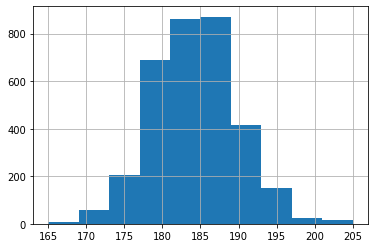

In [42]:
df['height'].hist()

Построим гистограмму ещё раз, указав в качестве аргумента `bins` число $20$, чтобы получить более детальную картину:

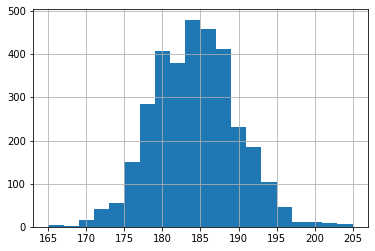

In [54]:
df['height'].hist(bins=20)

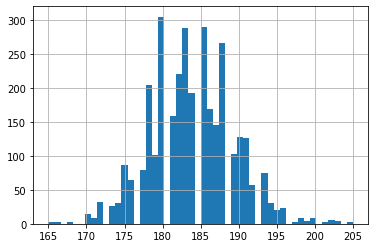

In [44]:
df['height'].hist(bins=50)

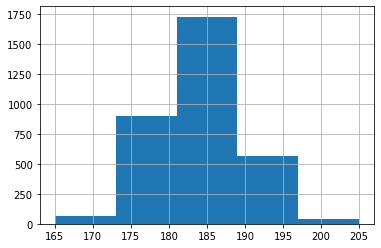

In [49]:
df['height'].hist(bins=5)

In [ ]:
df.head()

Другой способ визуализировать одномерные данные — __boxplot__ или __ящик с усами__. В самом ящике отмечены квартили $Q1$, $Q2$ (медиана), $Q3$. «Усы» здесь — границы отрезка
$$\left[ Q1 - 1.5 \times IQR, \: Q3 + 1.5 \times IQR \right],$$
где $IQR$ — интерквартильное расстояние.

__Пример 9__

Построим `boxplot` роста хоккеистов.

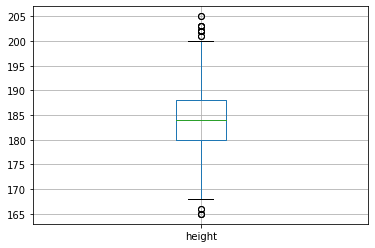

In [55]:
df[['height']].boxplot()

Всё, что выходит за границы этого отрезка, считается выбросами (отмечены кружками). Посчитаем, сколько значений роста оказалось за пределами «усов».

In [56]:
q1 = df['height'].quantile(0.25)
q3 = df['height'].quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(168.0, 200.0)

In [57]:
outliers = df.loc[(df['height'] < boxplot_range[0]) | (df['height'] > boxplot_range[1])]

outliers.shape[0]

19

In [58]:
outliers

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
285,2001,SVK,3,chara zdeno,D,L,202,105.0,1977-03-18,new york islanders,24.120465,1977,25.732771
356,2001,USA,25,gill hal,D,L,202,109.0,1975-04-06,boston bruins,26.069815,1975,26.713067
406,2002,AUT,32,lakos andre,D,L,202,104.0,1979-07-29,utah grizzlies,22.757016,1979,25.487697
1175,2004,AUT,32,lakos andre,D,R,203,103.0,1979-07-29,vienna capitals,24.758385,1979,24.994540
1443,2004,SVK,3,chara zdeno,D,L,205,117.0,1977-03-18,ottawa senators,27.121150,1977,27.840571
1514,2004,USA,26,gill hal,D,L,202,100.0,1975-04-06,boston bruins,29.070500,1975,24.507401
1565,2005,AUT,32,lakos andre,D,R,203,103.0,1979-07-29,syracuse crunch,25.757700,1979,24.994540
1836,2005,SVK,3,chara zdeno,D,L,205,117.0,1977-03-18,farjestad karlstad,28.120465,1977,27.840571
1911,2005,USA,25,gill hal,D,L,201,108.0,1975-04-06,lukko rauma,30.069815,1975,26.732012
2088,2006,ITA,11,fontanive nicola,F,L,165,71.0,1985-10-25,hc alleghe,20.514716,1985,26.078972


Доля выбросов:

In [59]:
outliers.shape[0] / df.shape[0]

0.005768063145112325

### Упражнения

__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Своими руками (т.е. без использования статистических функций вроде `mean`, `std`, `var`) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

__Задача 2__

Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. 

В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

__Задача 3__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.